<a href="https://colab.research.google.com/github/YabuYita/CODSOFT/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Price Prediction

In [2]:
from google.colab import files
files.upload()

Saving house price prediction dataset.zip to house price prediction dataset.zip


{'house price prediction dataset.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00X\x92,T\xf8q\xf3\xd7\xff\xff\xff\xff\xff\xff\xff\xff\x0b\x00\x14\x00Housing.csv\x01\x00\x10\x00\x1du\x00\x00\x00\x00\x00\x00\xe4\x11\x00\x00\x00\x00\x00\x00\x9d\x9d\xebn,\xb7\r\x80\xff\x17\xe8\x9bl\x01\xdd\xa5y\x1c7q\x12\xa3\xc88\xf0qP\xf4\xed;#R\x1a]H\x8e\xe64\x8ew\x8f\x9b\xefP\xbc\x88\xa2(\xcd\xfa\xaf\xaf\x8f_\xde_o_\xefo\xaf\x7f\xbf\xff\xfa\xf5\xf9\xf9\xe7\x8f\xd7\xbf\xdf\xbe\xff\x80w?\xbe?\xbf>\xde\x7f\xbc\xfe|\xfb\xd8\xbf>\xdf~}\xfd\xfe\xf7\xfb\x8f\xef\xf3\xff;\xfe\xa3\x1f\xef\x7f\xbe\xef\xdf\xaf?>\xbf\xff\xfb\xf6\xfd\xfe\xf5\xc7\xfb\xdb\xf7\xc7\xfe\xfb\xeb\xed\xe3\xeb\x97\xcf\xfd\xd7\x8f\xef\x8f\xcf\xfd\xfc\xf3_o_\xff\xc9\xaf_\xef\xbfe9\xbf\xfd\xfd\xb5\x7f\xfc\xf8\xe3\xf8\xd9\x8f\xef\xb7\xef\xbf\x7f\xfc\xf3\x1f\xdaZu\xfe\xef\x15\x9dQ/\xf72/\xfb\xfa\xdf!v\xff\xc4\xaf\xf3\x0f&\x7fG\xf8\xfd\xd7\x832\xc6g*m\xe1\xa4\xce\x7f&\xca\x9eo(h;!{\xfc\xad\xa6@\x17\x0b?:\xf4\xfb\xf8W\x8fj\x9fGy|\xcf\xa3\x1cQ\x108\x0eS;\xdd*

In [5]:
!unzip "house price prediction dataset.zip"

Archive:  house price prediction dataset.zip
  inflating: Housing.csv             


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
df = df.dropna()


In [11]:
X = df.drop('price', axis=1)
y = df['price']


In [12]:
X = pd.get_dummies(X, drop_first=True)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test)


In [18]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 970043.4039201642
MSE: 1754318687330.6677
RMSE: 1324506.96009144
R² Score: 0.6529242642153177


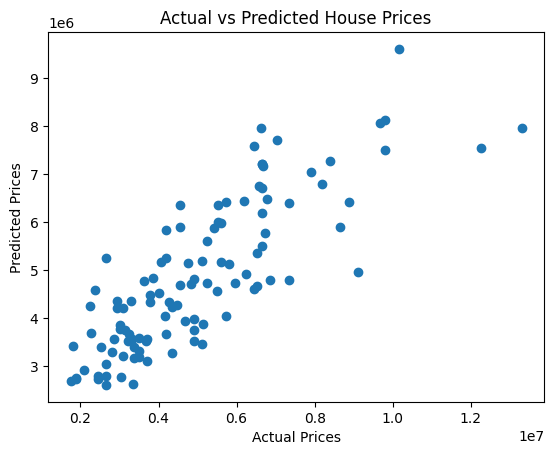

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [22]:
X = pd.get_dummies(X, drop_first=True)
feature_names = X.columns
feature_names


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [23]:
new_house_dict = {
    'area': 2500,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 1,
    'mainroad_yes': 1,
    'guestroom_yes': 0,
    'basement_yes': 0,
    'hotwaterheating_yes': 0,
    'airconditioning_yes': 1,
    'parking': 1,
    'prefarea_yes': 0,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 0
}

new_house = pd.DataFrame([new_house_dict])


In [24]:
new_house = new_house[feature_names]


In [25]:
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 5060845.237849536
